In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [72]:
df = pd.read_csv('./data/산불_2003_2021.csv',index_col=0)
df.head()

,발생일시_년,발생일시_월,발생일시_일,발생일시_시간,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,발생장소_시도,발생장소_시군구,발생장소_읍면,발생장소_동리,발생원인,피해면적_합계
0,2021,12,30,14:57,목,2021,12,30,17:30,경북,봉화,명호,양곡,주택화재비화,0.50
1,2021,12,30,11:16,목,2021,12,30,12:30,충북,청주,오송,상봉,원인미상,0.40
2,2021,12,29,14:20,수,2021,12,29,17:30,경남,남해,창선,가인,원인미상,0.50
3,2021,12,29,13:53,수,2021,12,29,16:10,전남,순천,NaN,대룡,쓰레기소각,0.03
4,2021,12,29,05:47,수,2021,12,29,12:00,전남,완도,완도,장좌,입산자실화,0.10


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8204 entries, 0 to 3394
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   발생일시_년     8204 non-null   int64  
 1   발생일시_월     8204 non-null   int64  
 2   발생일시_일     8204 non-null   int64  
 3   발생일시_시간    8204 non-null   object 
 4   발생일시_요일    8204 non-null   object 
 5   진화종료시간_년   8204 non-null   int64  
 6   진화종료시간_월   8204 non-null   int64  
 7   진화종료시간_일   8204 non-null   int64  
 8   진화종료시간_시간  8204 non-null   object 
 9   발생장소_시도    8204 non-null   object 
 10  발생장소_시군구   8204 non-null   object 
 11  발생장소_읍면    7886 non-null   object 
 12  발생장소_동리    6779 non-null   object 
 13  발생원인       8167 non-null   object 
 14  피해면적_합계    8204 non-null   float64
dtypes: float64(1), int64(6), object(8)
memory usage: 1.0+ MB


In [74]:
df.isnull().sum()

발생일시_년          0
발생일시_월          0
발생일시_일          0
발생일시_시간         0
발생일시_요일         0
진화종료시간_년        0
진화종료시간_월        0
진화종료시간_일        0
진화종료시간_시간       0
발생장소_시도         0
발생장소_시군구        0
발생장소_읍면       318
발생장소_동리      1425
발생원인           37
피해면적_합계         0
dtype: int64

In [75]:
# 날짜 합치기 위해 자료형(int->str) 바꾸기
df[['발생일시_년','발생일시_월','발생일시_일','진화종료시간_년','진화종료시간_월','진화종료시간_일']] =df[['발생일시_년','발생일시_월','발생일시_일','진화종료시간_년','진화종료시간_월','진화종료시간_일']].astype(str)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8204 entries, 0 to 3394
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   발생일시_년     8204 non-null   object 
 1   발생일시_월     8204 non-null   object 
 2   발생일시_일     8204 non-null   object 
 3   발생일시_시간    8204 non-null   object 
 4   발생일시_요일    8204 non-null   object 
 5   진화종료시간_년   8204 non-null   object 
 6   진화종료시간_월   8204 non-null   object 
 7   진화종료시간_일   8204 non-null   object 
 8   진화종료시간_시간  8204 non-null   object 
 9   발생장소_시도    8204 non-null   object 
 10  발생장소_시군구   8204 non-null   object 
 11  발생장소_읍면    7886 non-null   object 
 12  발생장소_동리    6779 non-null   object 
 13  발생원인       8167 non-null   object 
 14  피해면적_합계    8204 non-null   float64
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [77]:
df['발생일시'] = df['발생일시_년']+'-'+ df['발생일시_월']+'-'+ df['발생일시_일']
df['발생일시']

0       2021-12-30
1       2021-12-30
2       2021-12-29
3       2021-12-29
4       2021-12-29
           ...    
3390      2006-1-2
3391      2006-1-2
3392      2006-1-3
3393      2006-1-3
3394      2006-1-3
Name: 발생일시, Length: 8204, dtype: object

In [78]:
df['진화종료일시'] = df['진화종료시간_년']+'-'+ df['진화종료시간_월']+'-'+ df['진화종료시간_일']
df['진화종료일시']

0       2021-12-30
1       2021-12-30
2       2021-12-29
3       2021-12-29
4       2021-12-29
           ...    
3390      2006-1-2
3391      2006-1-2
3392      2006-1-3
3393      2006-1-3
3394      2006-1-3
Name: 진화종료일시, Length: 8204, dtype: object

In [79]:
# 발생장소 발생장소_시도	발생장소_시군구	발생장소_읍면	발생장소_동리

df['발생장소'] = df['발생장소_시도'] + ' '+ df['발생장소_시군구']
df['발생장소']

0       경북 봉화
1       충북 청주
2       경남 남해
3       전남 순천
4       전남 완도
        ...  
3390    경남 마산
3391    대구 달서
3392    경북 칠곡
3393    경북 칠곡
3394    경북 영덕
Name: 발생장소, Length: 8204, dtype: object

In [80]:
df.head()

,발생일시_년,발생일시_월,발생일시_일,발생일시_시간,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,발생장소_시도,발생장소_시군구,발생장소_읍면,발생장소_동리,발생원인,피해면적_합계,발생일시,진화종료일시,발생장소
0,2021,12,30,14:57,목,2021,12,30,17:30,경북,봉화,명호,양곡,주택화재비화,0.50,2021-12-30,2021-12-30,경북 봉화
1,2021,12,30,11:16,목,2021,12,30,12:30,충북,청주,오송,상봉,원인미상,0.40,2021-12-30,2021-12-30,충북 청주
2,2021,12,29,14:20,수,2021,12,29,17:30,경남,남해,창선,가인,원인미상,0.50,2021-12-29,2021-12-29,경남 남해
3,2021,12,29,13:53,수,2021,12,29,16:10,전남,순천,NaN,대룡,쓰레기소각,0.03,2021-12-29,2021-12-29,전남 순천
4,2021,12,29,05:47,수,2021,12,29,12:00,전남,완도,완도,장좌,입산자실화,0.10,2021-12-29,2021-12-29,전남 완도


In [81]:
# 사용할 열 추출

df_fire = df[['발생일시','진화종료일시','발생원인','발생장소', '피해면적_합계']]
df_fire = df_fire.sort_values(by='피해면적_합계', ascending = False)
df_fire

,발생일시,진화종료일시,발생원인,발생장소,피해면적_합계
579,2020-4-24,2020-4-27,입산자실화 추정,경북 안동,1944.00
1264,2019-4-4,2019-4-5,특고압 전선 아크 불티,강원 고성,1266.62
1261,2019-4-4,2019-4-5,신당 전기초 합선,강원 강릉,1260.15
2449,2005-4-4,2005-4-6,입산자실화추정,강원 양양,973.00
2383,2017-5-6,2017-5-9,입산자 실화,강원 삼척,765.12
...,...,...,...,...,...
3117,2016-2-23,2016-2-23,조사중,울산 북,0.01
3119,2016-2-21,2016-2-21,담뱃불실화,부산 기장,0.01
3121,2016-2-21,2016-2-21,쓰레기소각,경기 가평,0.01
1489,2009-1-26,2009-1-26,농산폐기물소각,경남 하동,0.01


In [85]:
# 피해면적에 따라 발생여부를 구분

In [97]:
# 날짜별 피해면적
df_firesum = df_fire.groupby('발생일시').sum()
df_firesum.sort_values(by='피해면적_합계',ascending=False,inplace=True)
df_firesum

,피해면적_합계
발생일시,
2019-4-4,2881.19
2020-4-24,1947.62
2005-4-4,1184.67
2017-5-6,1108.53
2021-2-21,577.98
...,...
2017-4-20,0.01
2010-12-6,0.01
2020-9-26,0.01


In [98]:
np.percentile(df_firesum, q = [25,50,75])

array([0.1 , 0.31, 1.07])

In [101]:
df_firesum[df_firesum['피해면적_합계'] > 1 ]

,피해면적_합계
발생일시,
2019-4-4,2881.19
2020-4-24,1947.62
2005-4-4,1184.67
2017-5-6,1108.53
2021-2-21,577.98
...,...
2014-3-9,1.01
2017-11-30,1.01
2006-3-7,1.01


<AxesSubplot:>

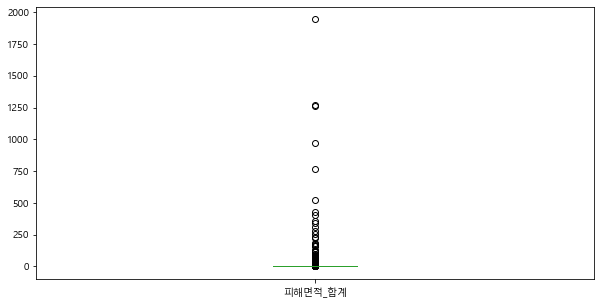

In [60]:
df_fire['피해면적_합계'].plot(kind='box',figsize=(10,5))

In [61]:
np.percentile(df_fire['피해면적_합계'],q=[25,50,75])

array([0.03, 0.1 , 0.3 ])

In [69]:
df_fire1 = df_fire[df_fire['피해면적_합계'] > 0.3]
df_fire1

,발생일시,진화종료일시,발생원인,발생장소,피해면적_합계
579,2020-4-24,2020-4-27,입산자실화 추정,경북 안동,1944.00
1264,2019-4-4,2019-4-5,특고압 전선 아크 불티,강원 고성,1266.62
1261,2019-4-4,2019-4-5,신당 전기초 합선,강원 강릉,1260.15
2449,2005-4-4,2005-4-6,입산자실화추정,강원 양양,973.00
2383,2017-5-6,2017-5-9,입산자 실화,강원 삼척,765.12
...,...,...,...,...,...
616,2006-3-23,2006-3-23,입산자실화,경기 안산,0.33
972,2019-12-28,2019-12-28,작업장실화,경기 광주,0.33
338,2004-3-28,2004-3-28,밭두렁소각,경기 화성,0.33
2680,2005-4-19,2005-4-19,입산자실화추정,대구 북,0.33


In [12]:
df_fire.to_csv('./data/산불_1.csv',index=False)